In [2]:
import ast
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\nonst\anaconda3\envs\python_work\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_job_count = df.groupby(['job_via','job_title_short']).size()
df_job_count = df_job_count.reset_index(name='count')
df_job_count = df_job_count.sort_values(by='count',ascending = False)
df_job_count

,job_via,job_title_short,count
11226,via LinkedIn,Data Engineer,58830
11225,via LinkedIn,Data Analyst,41778
11227,via LinkedIn,Data Scientist,37487
1450,via BeBee,Data Scientist,26608
1448,via BeBee,Data Analyst,25778
...,...,...,...
12541,via Mobiskill,Data Scientist,1
12542,via Mobiskill,Senior Data Scientist,1
12544,via Modis,Business Analyst,1
12545,via Modis,Cloud Engineer,1


In [4]:
job_titles = df['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:4])
job_titles

['Business Analyst', 'Data Analyst', 'Data Engineer', 'Senior Data Engineer']

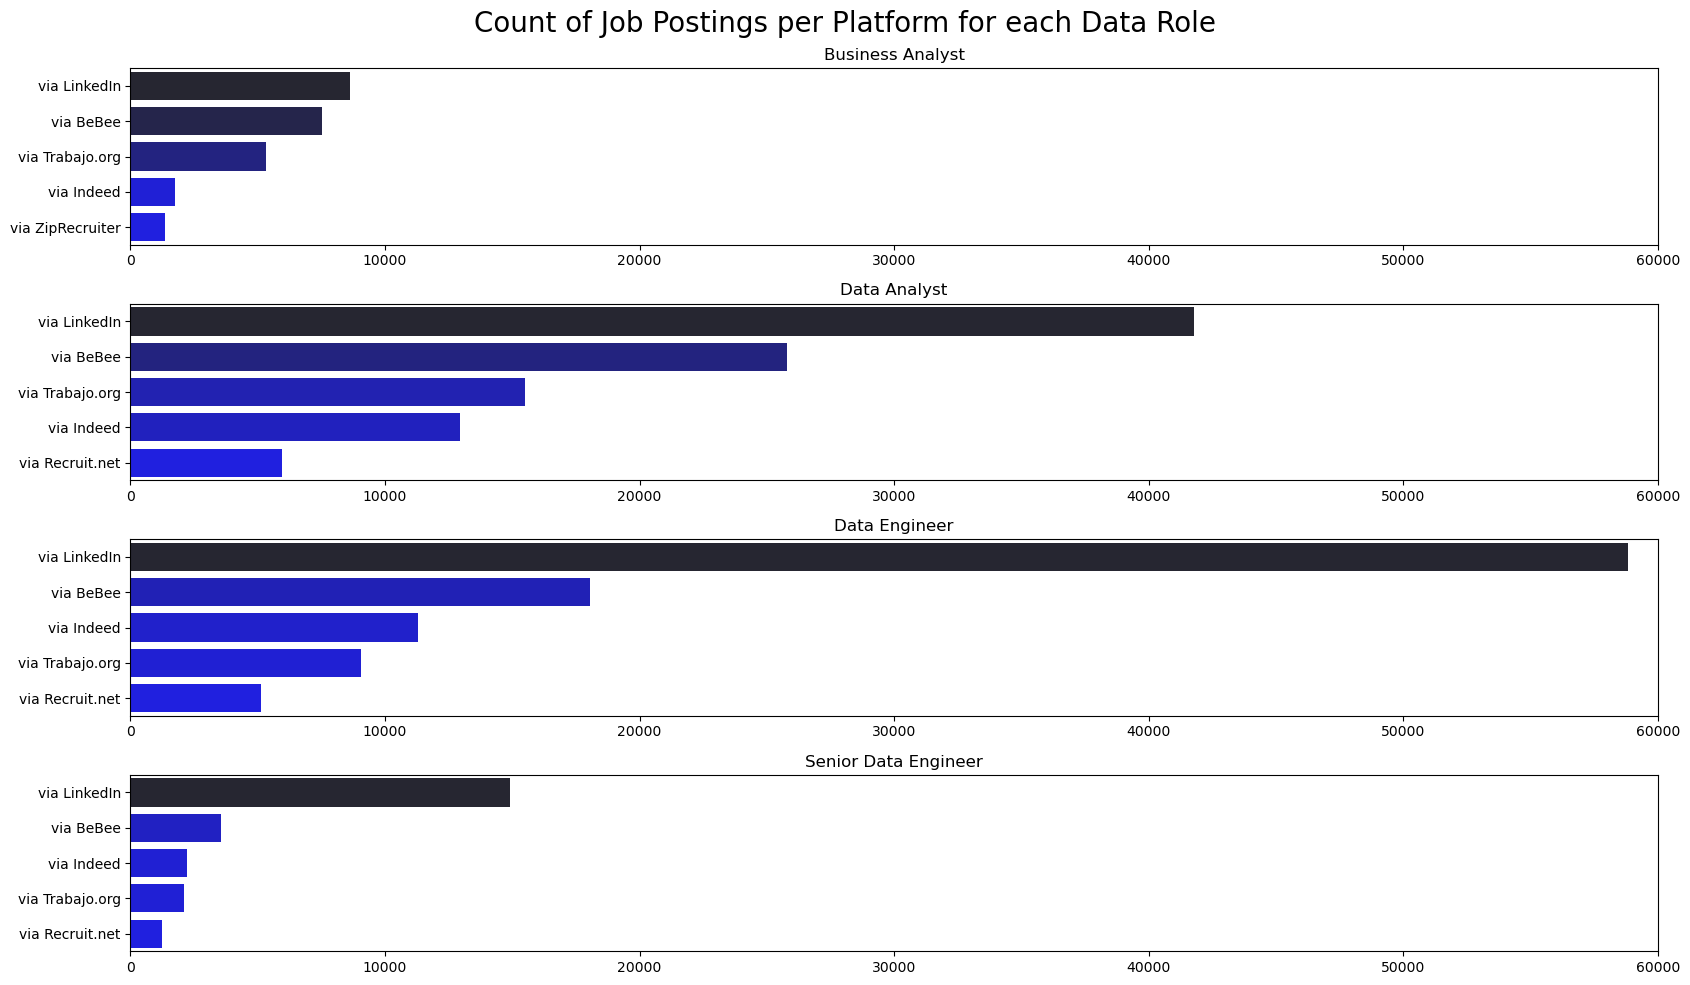

In [7]:
fig,ax = plt.subplots(len(job_titles),1,figsize=(17,10))

for i , job_title in enumerate(job_titles):
    df_plot = df_job_count[df_job_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot,x='count',y='job_via',ax=ax[i],hue='count',palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 60000)

    fig.tight_layout() 
    fig.suptitle('Count of Job Postings per Platform for each Data Role',fontsize = 20)

    

plt.show()